In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('apartments_final.csv')

In [3]:
df.head()

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,neighborhood
0,https://www.apartments.com/2372-beckwith-dr-in...,ze0jqwy,46218,751,2,1.0,679.0,25,33,705,39.80125,-86.12643,Martindale-Brightwood
1,https://www.apartments.com/7491-n-shadeland-av...,s34dq64,46250,1795,3,2.0,2500.0,54,33,1795,39.89034,-86.04540,I-69 Fall Creek
2,https://www.apartments.com/nice-3-bedroom-ranc...,n669z9m,46237,1095,3,1.0,1439.0,29,32,1095,39.72238,-86.12113,University Heights
3,https://www.apartments.com/1102-n-oakland-ave-...,c4kr5zf,46201,1300,3,1.5,1500.0,67,38,800,39.78265,-86.11278,Near Eastside
4,https://www.apartments.com/634-e-10th-st-india...,rl2dfp0,46202,1600,2,2.0,1400.0,74,53,1600,39.78089,-86.14610,Chatham Arch


The goal is to predict monthly rent of an apartment using the following features: 

Features we must include:
- Bedrooms
- Bathrooms
- Square Feet
- Neighborhood

Optional features:
- Longitude
- ZIP
- Walk score
- Transit score


In [12]:
df['bedbath']=df['bedrooms']*df['bathrooms']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [14]:
apt_train, apt_test = train_test_split(df.copy(),
                                        shuffle = True,
                                        random_state = 626,
                                        test_size=.2)

In [34]:
df['bedbath'].isnull().values.any()
df['square_feet'].isnull().sum().sum()

18

In [41]:
df[df['square_feet'].isna()]

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,neighborhood,bedbath
44,https://www.apartments.com/118-n-state-ave-ind...,kqgrljc,46201,1100,2,1.0,NaN,56,40,1100,39.76883,-86.13097,Holy Cross,2.0
49,https://www.apartments.com/1-e-raymond-st-indi...,7hrzlwx,46225,675,0,1.0,NaN,33,32,675,39.73714,-86.15884,Garfield Park,0.0
52,https://www.apartments.com/christian-park-4-be...,642v3kt,46201,750,4,1.0,NaN,62,36,750,39.76141,-86.11318,Near Southeast,4.0
77,https://www.apartments.com/4-br-2-bath-house-2...,7wcyfvz,46203,1395,4,2.0,NaN,54,36,1395,39.75862,-86.12391,Near Southeast,8.0
87,https://www.apartments.com/1128-windsor-st-ind...,kktgth8,46201,1150,3,1.0,NaN,58,41,975,39.78304,-86.13037,Near Eastside,3.0
93,https://www.apartments.com/9530-barr-dr-indian...,jxcx705,46229,1300,3,2.0,NaN,11,27,1300,39.80822,-85.99966,Far Eastside,6.0
121,https://www.apartments.com/3159-e-washington-s...,htnst63,46201,500,1,1.0,NaN,49,40,500,39.76844,-86.11100,Near Southeast,1.0
125,https://www.apartments.com/updated-1-bedroom-n...,k1kwsj8,46208,625,1,1.0,NaN,35,35,625,39.80278,-86.18478,Near NW Riverside,1.0
144,https://www.apartments.com/2315-prospect-st-in...,x9rz90n,46203,1500,2,2.0,NaN,38,31,1500,39.75222,-86.12285,Near Southeast,4.0
175,https://www.apartments.com/2838-n-chester-ave-...,nlcbyhn,46218,1300,5,1.5,NaN,32,32,1300,39.80788,-86.09973,Martindale-Brightwood,7.5


In [40]:
df.square_feet.unique()

array([ 679., 2500., 1439., 1500., 1400.,  750.,  824.,  596., 1300.,
       1988., 1621., 1781., 1052., 1664., 1408., 1900.,  655.,  992.,
       1860., 2036., 1641., 2104., 2474., 1050., 1212., 2140.,  864.,
       2800., 1390., 1000., 2688., 2016., 1020.,  543., 1263., 1342.,
        975., 2536., 2424., 2181., 1084.,  923.,   nan, 3838., 1862.,
       2576., 1920., 2687., 1926., 2000., 1410., 2032., 1720.,  700.,
       1120., 2328., 1255., 1004., 1919., 1632., 1688., 1130.,  763.,
       2430., 1375., 1648., 1556., 2980., 1365.,  625., 1030., 1064.,
       1440., 1800., 1216., 1551., 1108.,  980., 1576.,  720., 1260.,
        650., 1895., 1419., 1371., 1100., 1063.,  842., 1135.,  950.,
        550.,  988.,  689., 3308.,  910., 1425., 1295.,  775.,  500.,
       1176., 1886., 2200., 2184., 1200.,  690., 1606., 1610., 1356.,
       3104., 1680., 1293.,  784., 1446., 1769., 1270., 1491., 1560.,
       1244., 2668., 1008.,  708., 1911.,  900., 1582., 1220., 1992.,
       2886., 3074.,

In [16]:
kfold = KFold(n_splits=10, shuffle=True, random_state=4530)

In [17]:
models = ['baseline',
             ['bedrooms', 'bathrooms'],
             ['bedrooms', 'bathrooms', 'square_feet'],
             ['bedrooms', 'bathrooms', 'square_feet', 'bedbath']]

In [19]:
cv_mses = np.zeros((10, len(models)))


i = 0
for train_index, test_index in kfold.split(apt_train):
    apt_tt = apt_train.iloc[train_index]
    apt_holdout = apt_train.iloc[test_index]
    j = 0
    for model in models:
        if model == "baseline":
            train_mean = apt_tt.monthly_rent.mean()
            cv_mses[i,j] = mean_squared_error(apt_holdout.monthly_rent, train_mean*np.ones(len(apt_holdout)))
        else:
            reg = LinearRegression(copy_X = True)
            reg.fit(apt_tt[model], apt_tt.monthly_rent)
            cv_mses[i,j] = mean_squared_error(apt_holdout.monthly_rent, reg.predict(apt_holdout[model]))
        j = j + 1
    i = i + 1

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [8]:
reg = LinearRegression(copy_X=True, fit_intercept=False)
reg.fit(df[['bedrooms','bathrooms']].values, df['monthly_rent'])

LinearRegression(fit_intercept=False)

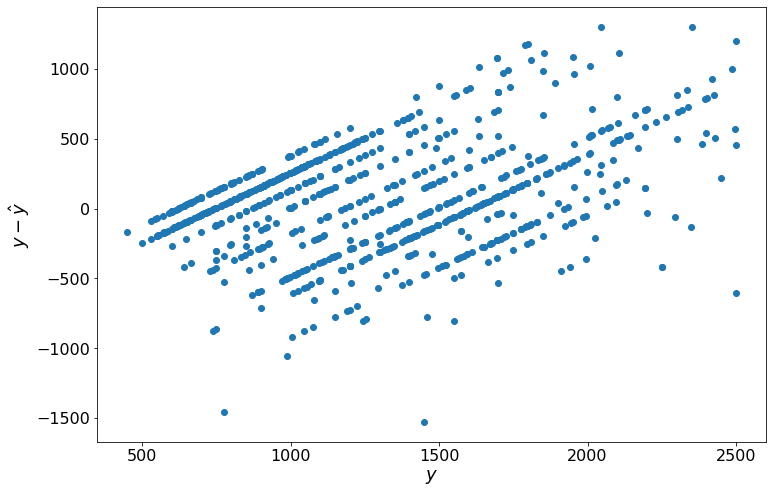

In [10]:
plt.figure(figsize=(12,8))

plt.scatter(df.monthly_rent, df.monthly_rent - reg.predict(df[['bedrooms','bathrooms']].values))

plt.xlabel("$y$", fontsize=18)
plt.ylabel("$y - \hat{y}$", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()